So everything below this cell, is simply important imported libraries that will be used later down the line. This first cell is composed of 2 classes; the first one (PokemonCard) is simply the important attributes to a card such as the image url, the rarity, name, and set name. the second (PokemonTCG) is simply requesting with an API key all the necessary information to which i create and save all the files in a pokemon_card.txt file. So given an API key and a list of the sets from which i want the cards from, it will iterate through the list of sets, which will in turn iterate trhough every card in that set to provide me with a total list of cards from all the sets provided.


SUPER IMPORTANT NOTE:
!!!!Please note that the API, with as many api request as i am doing,may not provide all the cards requested due to overload of request and may interupt the program. Nonetheless, the purpose of the first cell is simply to save all card classes information into a txt file, so that we could work on the data locally instead of requesting more ressources. You should expect aroung 300-400kb of data (which should be sufficient) before getting interrupted. Also it is possible that the server may be experiencing issues and may not run please contact if that happens as i saved all the information on my computer locally and can provide the data to run the res tof the code!!!!

In [1]:
import requests
import time
import os
from io import BytesIO
import cv2
import numpy as np
from PIL import Image
from json.decoder import JSONDecodeError
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

class PokemonCard:
    def __init__(self, image_url, rarity, name, set_name):
        self.image_url = image_url
        self.rarity = rarity
        self.name = name
        self.set_name = set_name

    def __str__(self):
        return f"Name: {self.name}\nRarity: {self.rarity}\nSet: {self.set_name}\nImage URL: {self.image_url}"

#This is just used to retrieve the information into a txt, but upon asking the prof i was able to use the gdown method to download the data that i collected using this method, and to avoid wasting time, you would have quick access to that file.
'''
class PokemonTCG:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = 'https://api.pokemontcg.io/v2/'

    # Defining a method to retrieve everycard given the set name
    def get_cards(self, set_list):
        with open("pokemon_cards.txt", "w") as f:
            for set_code in set_list:
                url_set = f"{self.base_url}sets/{set_code}"
                params = {'api_key': self.api_key}
                response_set = requests.get(url_set, params=params)
                # Finding all the cards in a given set
                try:
                    total_cardset = response_set.json()['data']['total']
                except JSONDecodeError as e:
                    print(f"JSONDecodeError: {e}")
                    f.flush()  # flush the buffer to ensure that everything written so far is saved
                    continue  # re-raise the exception so that it can be handled by the calling code
                for i in range(1, total_cardset+1):
                    # Changing the card by iterating i in the range of the total card set
                    url_card = f"{self.base_url}cards/{set_code}-{i}"
                    response_card = requests.get(url_card, params=params)
                    # If the request is fufilled
                    if response_card.status_code == 200:
                        card_info = response_card.json()['data']
                        image_url = card_info['images']['large']
                        rarity = card_info['rarity']
                        if rarity == "Rare Holo":
                            rarity = "Rare"
                        elif rarity not in ["Common", "Uncommon", "Rare"]:
                            rarity = "Special Rare"
                        card_name = card_info['name']
                        set_name = card_info['set']['name']
                        card = PokemonCard(image_url=image_url, rarity=rarity, name=card_name, set_name=set_name)
                        f.write(str(card) + "\n")
                    # If i make too many API request i need to wait
                    elif response_card.status_code == 429:
                        # print(f"Error: {response_card.status_code} - Throttled. Waiting for 1 second...")
                        time.sleep(5)
                        # Make the request again
                        response_card = requests.get(url_card, params=params)
                        if response_card.status_code == 200:
                            card_info = response_card.json()['data']
                            image_url = card_info['images']['large']
                            rarity = card_info['rarity']
                            if rarity == "Rare Holo":
                                rarity = "Rare"
                            elif rarity not in ["Common", "Uncommon", "Rare"]:
                                rarity = "Special Rare"
                            card_name = card_info['name']
                            set_name = card_info['set']['name']
                            card = PokemonCard(image_url=image_url, rarity=rarity, name=card_name, set_name=set_name)
                            f.write(str(card) + "\n")
                    else:
                        print("Could not get specified card, Process will continue ...")
                        '''


'\nclass PokemonTCG:\n    def __init__(self, api_key):\n        self.api_key = api_key\n        self.base_url = \'https://api.pokemontcg.io/v2/\'\n\n    # Defining a method to retrieve everycard given the set name\n    def get_cards(self, set_list):\n        with open("pokemon_cards.txt", "w") as f:\n            for set_code in set_list:\n                url_set = f"{self.base_url}sets/{set_code}"\n                params = {\'api_key\': self.api_key}\n                response_set = requests.get(url_set, params=params)\n                # Finding all the cards in a given set\n                try:\n                    total_cardset = response_set.json()[\'data\'][\'total\']\n                except JSONDecodeError as e:\n                    print(f"JSONDecodeError: {e}")\n                    f.flush()  # flush the buffer to ensure that everything written so far is saved\n                    continue  # re-raise the exception so that it can be handled by the calling code\n                fo

In the cell below i simply provide an API key for the class above and a list of all the set to which i want to retrieve card information from, which will all be appended to a brand new file called pokemon_cards.txt

In [ ]:
# Defining the API key and sets i want to retrieve cards from. no need to run it as youll be downloading the txt file it generated in the next code block.
'''
api_key = 'a78365e6-a39c-404e-b110-620ac81bc2b5'
pokemon_tcg = PokemonTCG(api_key)
tr_set_list = ['xy1','xy2','xy3','xy4','xy5','xy6','xy7','xy8','xy9','swsh1','swsh2','swsh3','swsh4','swsh5','swsh6','swsh7','swsh8','swsh9','sm1','sm2','sm3','sm4','sm5','sm6','sm7','sm8','sm9']
tr_card_list = pokemon_tcg.get_cards(tr_set_list)
'''


"\napi_key = 'a78365e6-a39c-404e-b110-620ac81bc2b5'\npokemon_tcg = PokemonTCG(api_key)\ntr_set_list = ['xy1','xy2','xy3','xy4','xy5','xy6','xy7','xy8','xy9','swsh1','swsh2','swsh3','swsh4','swsh5','swsh6','swsh7','swsh8','swsh9','sm1','sm2','sm3','sm4','sm5','sm6','sm7','sm8','sm9']\ntr_card_list = pokemon_tcg.get_cards(tr_set_list)\n"

In [2]:
!gdown 11RJPdrTzby8YYz8o9UwLFI7o5VMTWyab

Downloading...
From: https://drive.google.com/uc?id=11RJPdrTzby8YYz8o9UwLFI7o5VMTWyab
To: /content/pokemon_cards.txt
100% 431k/431k [00:00<00:00, 77.2MB/s]


The code below allows me to store all the data from the txt file previously doownloaded in a list called pokemon_cards. it is an array of the PokemonCard class that was defined earlier. 

In [3]:
# Open the text file for reading
with open('pokemon_cards.txt', 'r') as f:
    lines = f.readlines()

# Create an empty list to store PokemonCard objects
pokemon_cards = []

# Loop through the lines of the file and create PokemonCard objects
for i in range(0, len(lines), 4):
    name = lines[i].strip().split(': ')[1]
    rarity = lines[i+1].strip().split(': ')[1]
    set_name = lines[i+2].strip().split(': ')[1]
    image_url = lines[i+3].strip().split(': ')[1]
    pokemon_card = PokemonCard(image_url=image_url, rarity=rarity, name=name, set_name=set_name)
    pokemon_cards.append(pokemon_card)

So here i am splitting my data into 2 different folders with a 80:20 split for training and test data. in those folders i will create 4 more folders (one for each rarity) and will store the cards according to their designated rarity. not only are storing the actually immage (in a jpeg format) but we are also resizing the shape to a (256,256) size.

In [4]:
# Create directories to store the images
train_dir = 'train_images'
test_dir = 'test_images'

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Split the data into training and testing sets with an 80:20 ratio
train_cards, test_cards = train_test_split(pokemon_cards, test_size=0.2, random_state=42)

# Download and preprocess the training images
for card in train_cards:
    response = requests.get(card.image_url)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    image = image.resize((256, 256))
    image_array = np.array(image)
    image_array = image_array / 255.0
    filename = f"{card.rarity}_{card.name}.jpg"
    filepath = os.path.join(train_dir, card.rarity, filename)
    if not os.path.exists(os.path.join(train_dir, card.rarity)):
        os.makedirs(os.path.join(train_dir, card.rarity))
    Image.fromarray((image_array * 255).astype(np.uint8)).save(filepath)

# Download and preprocess the testing images
for card in test_cards:
    response = requests.get(card.image_url)
    image = Image.open(BytesIO(response.content)).convert("RGB")
    image = image.resize((256, 256))
    image_array = np.array(image)
    image_array = image_array / 255.0
    filename = f"{card.rarity}_{card.name}.jpg"
    filepath = os.path.join(test_dir, card.rarity, filename)
    if not os.path.exists(os.path.join(test_dir, card.rarity)):
        os.makedirs(os.path.join(test_dir, card.rarity))
    Image.fromarray((image_array * 255).astype(np.uint8)).save(filepath)

- Here i simply does a bunch of transformation on the format of my trianing data set including resizing, random horizontal flipping, random rotation, color jitter, converting to a tensor, and normalizing the pixel values using mean and standard deviation values specific to the ImageNet dataset.
- Next the code loads the training dataset and creates a data loader to iterate over the dataset during training. The data loader takes batches of 16 images at a time and shuffles the data randomly.
- Before getting into my CNN model, i define the best hardware option so if a GPU is available we us it to do the calculations, if not, we use the CPU.
- Just like we did in the labs,we define the CNN model architecture as a subclass of nn.Module. The model consists of four convolutional layers, each followed by a ReLU activation function and max pooling, two fully connected layers, and a final output layer with four output nodes (corresponding to the four classes in the dataset {Common, Uncommon, Rare, Special Rare}).
- We then define the optimizer and loss function used to correct/improve the model.
- The code enters a loop over the specified number of epochs (15 in this case), and for each epoch, it loops over all batches of the training data. For each batch, it moves the images and labels to the device, performs a forward pass through the model to obtain predicted labels, calculates the loss based on the difference between predicted and actual labels, and updates the model parameters using backpropagation.
- Finally at the end of each epoch i generate the trianing acuracy and plot it for visual assistance. allowing me to see if the mdoel is actually improving or not.

Yes
Starting training...
Epoch [1/30], Training Accuracy: 58.69%
Epoch [2/30], Training Accuracy: 65.57%
Epoch [3/30], Training Accuracy: 63.97%
Epoch [4/30], Training Accuracy: 64.96%
Epoch [5/30], Training Accuracy: 66.17%
Epoch [6/30], Training Accuracy: 72.39%
Epoch [7/30], Training Accuracy: 69.75%
Epoch [8/30], Training Accuracy: 74.15%
Epoch [9/30], Training Accuracy: 74.20%
Epoch [10/30], Training Accuracy: 76.35%
Epoch [11/30], Training Accuracy: 77.45%
Epoch [12/30], Training Accuracy: 77.12%
Epoch [13/30], Training Accuracy: 78.60%
Epoch [14/30], Training Accuracy: 78.05%
Epoch [15/30], Training Accuracy: 79.32%
Epoch [16/30], Training Accuracy: 79.21%
Epoch [17/30], Training Accuracy: 79.87%
Epoch [18/30], Training Accuracy: 79.26%
Epoch [19/30], Training Accuracy: 81.85%
Epoch [20/30], Training Accuracy: 80.97%
Epoch [21/30], Training Accuracy: 82.23%
Epoch [22/30], Training Accuracy: 83.44%
Epoch [23/30], Training Accuracy: 83.83%
Epoch [24/30], Training Accuracy: 82.67%


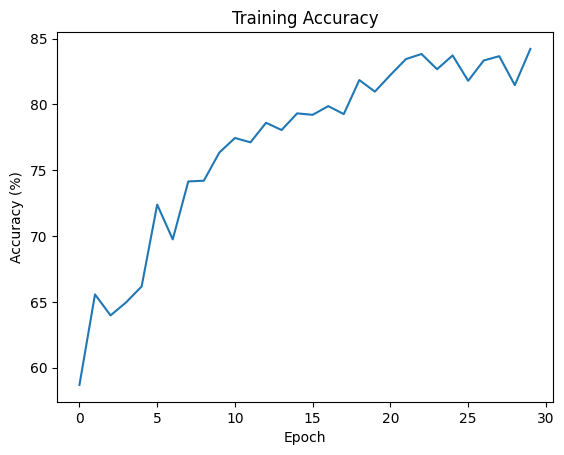

Training finished.


In [5]:
# Define transforms for training and testing data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
train_dataset = datasets.ImageFolder(root='train_images', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Define device, seeing if you ahve a gpu available to use instead of CPU

if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.randn(1, 1).to(device)
    if x.device.type == "cuda":
        print("Yes")
    else:
        print("No")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(512 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = nn.ReLU()(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = nn.ReLU()(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = nn.ReLU()(x)
        x = self.pool(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = nn.ReLU()(x)
        x = self.pool(x)
        x = self.conv5(x)
        x = self.bn5(x)
        x = nn.ReLU()(x)
        x = self.pool(x)
        x = x.view(-1, 512 * 7 * 7)
        x = self.dropout(x)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = nn.ReLU()(self.fc2(x))
        x = self.fc3(x)
        return x

model = myCNN().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epoch = 30
print("Starting training...")
total_steps = len(train_loader)
train_accs = []

for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate training accuracy for this epoch
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    train_accs.append(train_acc)

    print('Epoch [{}/{}], Training Accuracy: {:.2f}%'
          .format(epoch+1, num_epoch, train_acc))

# Plot training accuracy over time
plt.plot(range(num_epoch), train_accs)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.show()
        
print("Training finished.")

Finally i just need to use my model to predict the cards in my test_images folder in order to see if it can perform well on cards it has never seen before.
- In this code, the model is tested on a separate set of images called the test set. Similar to the training set, the test set is loaded using datasets.ImageFolder and torch.utils.data.DataLoader.
- The code then uses a with torch.no_grad(): block to disable gradient computation, which reduces memory usage and speeds up computations. Within this block, the test images and their corresponding labels are loaded into the device, and the model is used to generate predictions on the images. The predictions are compared to the true labels to determine the number of correctly classified images, which is added to the correct variable.
- Finally i can test the accuracy of the test data with a simple function given the correct and total attribute. which shoudl according to my proposal be around than 80% (hopefully).

In [6]:
test_dataset = datasets.ImageFolder(root='test_images', transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))


Accuracy of the model on the test images: 79.00302114803625 %
